In [14]:
!pip install --upgrade pip
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

Defaulting to user installation because normal site-packages is not writeable


In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc, roc_auc_score

In [16]:
# import data
news = pd.read_csv("OnlineNewsPopularity.csv")
# https://code.datasciencedojo.com/datasciencedojo/datasets/tree/master/Online%20News%20Popularity


print(news.head())
print(news.info())

                                                 url   timedelta  \
0  http://mashable.com/2013/01/07/amazon-instant-...       731.0   
1  http://mashable.com/2013/01/07/ap-samsung-spon...       731.0   
2  http://mashable.com/2013/01/07/apple-40-billio...       731.0   
3  http://mashable.com/2013/01/07/astronaut-notre...       731.0   
4   http://mashable.com/2013/01/07/att-u-verse-apps/       731.0   

    n_tokens_title   n_tokens_content   n_unique_tokens   n_non_stop_words  \
0             12.0              219.0          0.663594                1.0   
1              9.0              255.0          0.604743                1.0   
2              9.0              211.0          0.575130                1.0   
3              9.0              531.0          0.503788                1.0   
4             13.0             1072.0          0.415646                1.0   

    n_non_stop_unique_tokens   num_hrefs   num_self_hrefs   num_imgs  ...  \
0                   0.815385         4.0     

In [17]:
news.dtypes

url                               object
 timedelta                       float64
 n_tokens_title                  float64
 n_tokens_content                float64
 n_unique_tokens                 float64
                                  ...   
 title_subjectivity              float64
 title_sentiment_polarity        float64
 abs_title_subjectivity          float64
 abs_title_sentiment_polarity    float64
 shares                            int64
Length: 61, dtype: object

In [18]:
news.isnull().sum()

url                              0
 timedelta                       0
 n_tokens_title                  0
 n_tokens_content                0
 n_unique_tokens                 0
                                ..
 title_subjectivity              0
 title_sentiment_polarity        0
 abs_title_subjectivity          0
 abs_title_sentiment_polarity    0
 shares                          0
Length: 61, dtype: int64

In [19]:
print(news.columns)

Index(['url', ' timedelta', ' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
       ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sent

In [20]:
# remove the space infront of columns
news.columns = news.columns.str.strip()

In [21]:
# make sure it removed space
print(news.columns)

Index(['url', 'timedelta', 'n_tokens_title', 'n_tokens_content',
       'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens',
       'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos',
       'average_token_length', 'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
     

In [22]:
print(news.columns[news.isna().any()])

Index([], dtype='object')


In [23]:
# Select columns where the data type is not int or float
non_numeric_features = news.select_dtypes(exclude=['int', 'float'])

# Print the selected non-numeric columns
print(non_numeric_features)

                                                     url
0      http://mashable.com/2013/01/07/amazon-instant-...
1      http://mashable.com/2013/01/07/ap-samsung-spon...
2      http://mashable.com/2013/01/07/apple-40-billio...
3      http://mashable.com/2013/01/07/astronaut-notre...
4       http://mashable.com/2013/01/07/att-u-verse-apps/
...                                                  ...
39639  http://mashable.com/2014/12/27/samsung-app-aut...
39640  http://mashable.com/2014/12/27/seth-rogen-jame...
39641  http://mashable.com/2014/12/27/son-pays-off-mo...
39642     http://mashable.com/2014/12/27/ukraine-blasts/
39643  http://mashable.com/2014/12/27/youtube-channel...

[39644 rows x 1 columns]


In [24]:
columns_to_drop = [
    'url',
    'timedelta', 'n_tokens_title', 'n_tokens_content',
       'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens',
    'num_self_hrefs',
       'average_token_length', 'num_keywords', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'is_weekend', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04',
        'min_positive_polarity','max_positive_polarity', 
       'min_negative_polarity', 'max_negative_polarity', 'title_subjectivity',
       'title_sentiment_polarity', 'abs_title_subjectivity',
       'abs_title_sentiment_polarity',
]

# drop the columns
news = news.drop(columns=columns_to_drop)

# columns left
print(news.columns)

Index(['num_hrefs', 'num_imgs', 'num_videos', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'global_rate_negative_words', 'rate_positive_words',
       'rate_negative_words', 'avg_positive_polarity', 'avg_negative_polarity',
       'shares'],
      dtype='object')


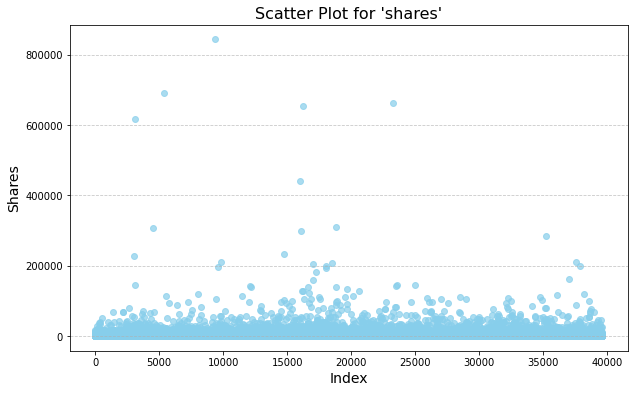

In [25]:
# Scatter plot for 'shares'
plt.figure(figsize=(10, 6))
plt.scatter(range(len(news['shares'])), news['shares'], color='skyblue', alpha=0.7)
plt.title("Scatter Plot for 'shares'", fontsize=16)
plt.xlabel("Index", fontsize=14)
plt.ylabel("Shares", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

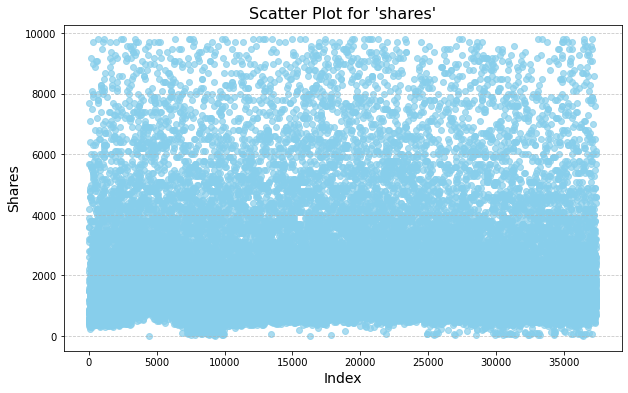

In [26]:
# fix the really one sided distrubution
Q1 = news['shares'].quantile(0.15)
Q3 = news['shares'].quantile(0.85)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# remove top and botttom 25%
news = news[(news['shares'] >= lower_bound) & (news['shares'] <= upper_bound)]

# Scatter plot for 'shares'
plt.figure(figsize=(10, 6))
plt.scatter(range(len(news['shares'])), news['shares'], color='skyblue', alpha=0.7)
plt.title("Scatter Plot for 'shares'", fontsize=16)
plt.xlabel("Index", fontsize=14)
plt.ylabel("Shares", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [27]:
# popular = top 30% shared news

threshold = np.percentile(news['shares'], 50)
# add is_pipluar column
news['is_popular'] = news['shares'].apply(lambda x: 1 if x >= threshold else 0)

In [28]:
# check threshold
unique_counts = news['is_popular'].nunique()
print(news['is_popular'].value_counts())

1    18912
0    18490
Name: is_popular, dtype: int64


In [29]:
# set the random seed
np.random.seed(123)

# set X without shares and is_popular
X = news.drop(columns=['shares', 'is_popular'])
y = news['is_popular']

# 70% for training and 30% as temporary data
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=123)

# from temporary data to 20% as validation, and 10% as test
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=1/3, random_state=123)

# 70: training, 20: validation, 10: test

print("Training set size:", X_train.shape)
print("Validation set size:", X_val.shape)
print("Test set size:", X_test.shape)

# seems it worked well

Training set size: (26181, 24)
Validation set size: (7480, 24)
Test set size: (3741, 24)


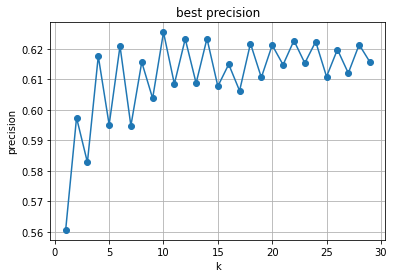

In [31]:
# make 1-30 k values
k_v = range(1, 30)
# make list
knn_acc = []

# every 1 to 30's accuracy_score as list
for k in k_v:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_val_pred = knn.predict(X_val)
    accuracy = precision_score(y_val, y_val_pred)
    knn_acc.append(accuracy)

# as graph
plt.plot(k_v, knn_acc, marker='o')
plt.xlabel("k")
plt.ylabel("precision")
plt.title("best precision")
plt.grid()
plt.show()

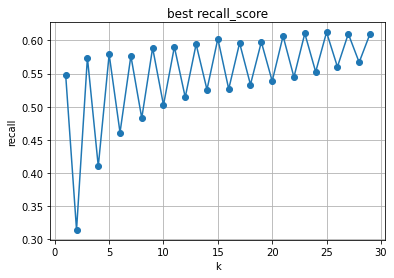

In [32]:
# make 1-30 k values
k_v = range(1, 30)
# make list
knn_acc = []

# every 1 to 30's accuracy_score as list
for k in k_v:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_val_pred = knn.predict(X_val)
    accuracy = recall_score(y_val, y_val_pred)
    knn_acc.append(accuracy)

# as graph
plt.plot(k_v, knn_acc, marker='o')
plt.xlabel("k")
plt.ylabel("recall")
plt.title("best recall_score")
plt.grid()
plt.show()

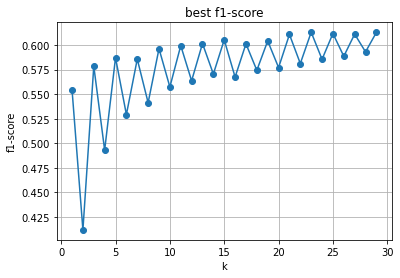

In [33]:
# make 1-20 k values
k_v = range(1, 30)
# make list
knn_acc = []

# every 1 to 30's f1 score as list
for k in k_v:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_val_pred = knn.predict(X_val)
    accuracy = f1_score(y_val, y_val_pred)
    knn_acc.append(accuracy)

# as graph
plt.plot(k_v, knn_acc, marker='o')
plt.xlabel("k")
plt.ylabel("f1-score")
plt.title("best f1-score")
plt.grid()
plt.show()

In [34]:
# make Gaussian Native bayes model
nb_model = GaussianNB()

# train model
nb_model.fit(X_train, y_train)

# make prediction base on training
y_val_pred = nb_model.predict(X_val)

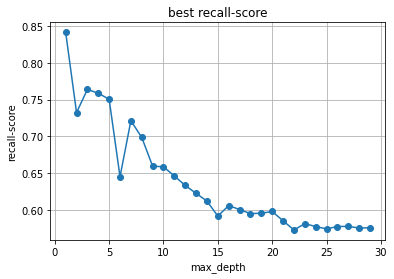

In [35]:
# test every depth
max_depth_values = range(1, 30)
val_accuracies = []

# every 1 to 20's f1-score as list for depth
for depth in max_depth_values:
    dt_model = DecisionTreeClassifier(random_state=123, max_depth=depth)
    dt_model.fit(X_train, y_train)
    y_val_pred = dt_model.predict(X_val)
    accuracy = recall_score(y_val, y_val_pred)
    val_accuracies.append(accuracy)

plt.plot(max_depth_values, val_accuracies, marker='o')
plt.title("best recall-score")
plt.xlabel("max_depth")
plt.ylabel("recall-score")
plt.grid()
plt.show()

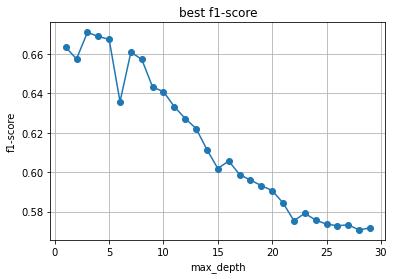

In [36]:
# test every depth
max_depth_values = range(1, 30)
val_accuracies = []

# every 1 to 20's f1-score as list for depth
for depth in max_depth_values:
    dt_model = DecisionTreeClassifier(random_state=123, max_depth=depth)
    dt_model.fit(X_train, y_train)
    y_val_pred = dt_model.predict(X_val)
    accuracy = f1_score(y_val, y_val_pred)
    val_accuracies.append(accuracy)

plt.plot(max_depth_values, val_accuracies, marker='o')
plt.title("best f1-score")
plt.xlabel("max_depth")
plt.ylabel("f1-score")
plt.grid()
plt.show()

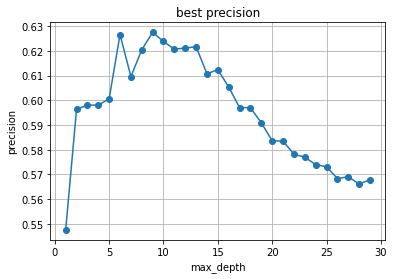

In [37]:
# test every depth
max_depth_values = range(1, 30)
val_accuracies = []

# every 1 to 20's accuracy_score as list for depth
for depth in max_depth_values:
    dt_model = DecisionTreeClassifier(random_state=123, max_depth=depth)
    dt_model.fit(X_train, y_train)
    y_val_pred = dt_model.predict(X_val)
    accuracy = precision_score(y_val, y_val_pred)
    val_accuracies.append(accuracy)

plt.plot(max_depth_values, val_accuracies, marker='o')
plt.title("best precision")
plt.xlabel("max_depth")
plt.ylabel("precision")
plt.grid()
plt.show()

In [38]:
# define the algorithm
knn = KNeighborsClassifier(n_neighbors=29)
knn.fit(X_train, y_train)

# make predictions on the validation dataset and test dataset
knn_val_pred = knn.predict(X_val)
knn_test_pred = knn.predict(X_test)

# predict probability on validation dataset and test dataset
knn_val_probs = knn.predict_proba(X_val)[:, 1]
knn_test_probs = knn.predict_proba(X_test)[:, 1]

# valuedataliaon?
knn_val_accuracy = accuracy_score(y_val, knn_val_pred)
knn_f1 =f1_score(y_val, knn_val_pred)
knn_precision = precision_score(y_val, knn_val_pred)
knn_recall = recall_score(y_val, knn_val_pred)
knn_val_auc = roc_auc_score(y_val, knn_val_probs)

# crate confusion matrix with true table as validation and predict as knn_val_pred
conf_matrix = confusion_matrix(y_val, knn_val_pred)
tn, fp, fn, tp = conf_matrix.ravel()

# confusion matrix into a 1D array
knn_fpr = fp/(fp + tn) if (fp + tn)> 0 else 0
knn_specificity = tn/(tn + fp) if (tn + fp)> 0 else 0


print("k-NN accuracy_score: ", knn_val_accuracy)
print("k-NN f1_score: ", knn_f1)
print("k-NN precision: ", knn_precision)
print("k-NN recall: ", knn_recall)
print("k-NN AUC score (Validation): ", knn_val_auc)
print("k-NN False Positive Rate (Validation): ", knn_fpr)
print("k-NN Specificity (Validation): ", knn_specificity)

k-NN accuracy_score:  0.6068181818181818
k-NN f1_score:  0.612771560236998
k-NN precision:  0.6156084656084656
k-NN recall:  0.6099606815203146
k-NN AUC score (Validation):  0.6416905337050024
k-NN False Positive Rate (Validation):  0.3964529331514325
k-NN Specificity (Validation):  0.6035470668485675


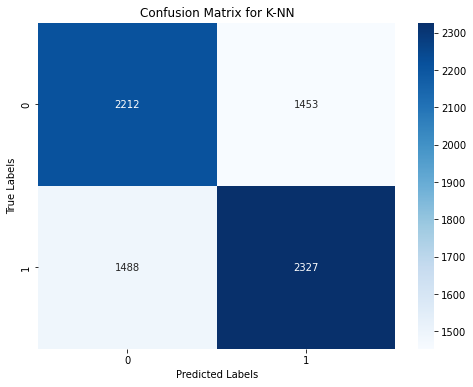

In [39]:
# add label
labels = ['0', '1'] 

# Creating the confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for K-NN")
plt.show()

In [40]:
dt_model = DecisionTreeClassifier(random_state=123, max_depth=5)
dt_model.fit(X_train, y_train)

dt_val_pred = dt_model.predict(X_val)
dt_test_pred = dt_model.predict(X_test)

dt_val_probs = dt_model.predict_proba(X_val)[:, 1]
dt_test_probs = dt_model.predict_proba(X_test)[:, 1]

dt_val_accuracy = accuracy_score(y_val, dt_val_pred)
dt_f1 =f1_score(y_val, dt_val_pred)
dt_precision = precision_score(y_val, dt_val_pred)
dt_recall = recall_score(y_val, dt_val_pred)
dt_val_auc = roc_auc_score(y_val, dt_val_probs)

conf_matrix = confusion_matrix(y_val, dt_val_pred)
tn, fp, fn, tp = conf_matrix.ravel()

dt_fpr = fp / (fp + tn) if (fp + tn) > 0 else 0
dt_specificity = tn / (tn + fp) if (tn + fp) > 0 else 0

print("Decision Tree accuracy_score: ", dt_val_accuracy)
print("Decision Tree f1_score: ", dt_f1)
print("Decision Tree precision: ", dt_precision)
print("Decision Tree recall: ", dt_recall)
print("Decision Tree AUC score: ", dt_val_auc)
print("Decision Tree False Positive Rate: ", dt_fpr)
print("Decision Tree Specificity: ", dt_specificity)

Decision Tree accuracy_score:  0.6183155080213903
Decision Tree f1_score:  0.6672881948490852
Decision Tree precision:  0.6007133864876206
Decision Tree recall:  0.7504587155963303
Decision Tree AUC score:  0.6474519872907797
Decision Tree False Positive Rate:  0.5192360163710777
Decision Tree Specificity:  0.48076398362892225


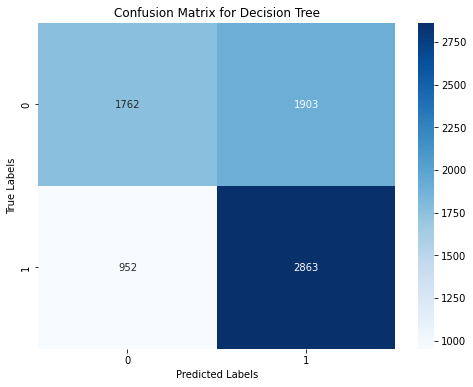

In [41]:
# add label
labels = ['0', '1'] 

# Creating the confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for Decision Tree")
plt.show()

In [42]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

nb_val_pred = nb_model.predict(X_val)
nb_test_pred = nb_model.predict(X_test)

nb_val_probs = nb_model.predict_proba(X_val)[:, 1]
nb_test_probs = nb_model.predict_proba(X_test)[:, 1]

nb_val_auc = roc_auc_score(y_val, nb_val_probs)

nb_val_accuracy = accuracy_score(y_val, nb_val_pred)
nb_f1 =f1_score(y_val, nb_val_pred)
nb_precision = precision_score(y_val, nb_val_pred)
nb_recall = recall_score(y_val, nb_val_pred)

conf_matrix = confusion_matrix(y_val, nb_val_pred)
tn, fp, fn, tp = conf_matrix.ravel()

nb_fpr = fp / (fp + tn) if (fp + tn) > 0 else 0
nb_specificity = tn / (tn + fp) if (tn + fp) > 0 else 0

print("Naive Bayes accuracy_score: ", nb_val_accuracy)
print("Naive Bayes f1_score: ", nb_f1)
print("Naive Bayes precision: ", nb_precision)
print("Naive Bayes recall: ", nb_recall)
print("Naive Bayes AUC score: ", nb_val_auc)
print("Naive Bayes False Positive Rate: ", nb_fpr)
print("Naive Bayes Specificity: ", nb_specificity)

Naive Bayes accuracy_score:  0.593048128342246
Naive Bayes f1_score:  0.5231829573934837
Naive Bayes precision:  0.650058388478007
Naive Bayes recall:  0.43774574049803405
Naive Bayes AUC score:  0.6575767014316646
Naive Bayes False Positive Rate:  0.24529331514324693
Naive Bayes Specificity:  0.7547066848567531


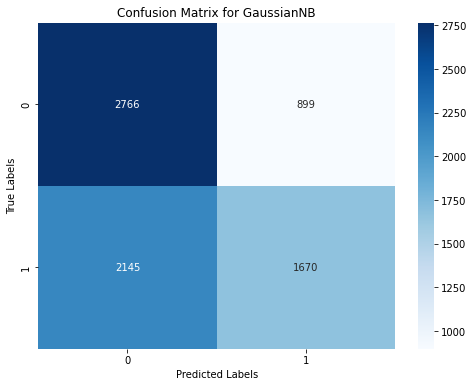

In [43]:
labels = ['0', '1'] 

# Creating the confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for GaussianNB")
plt.show()

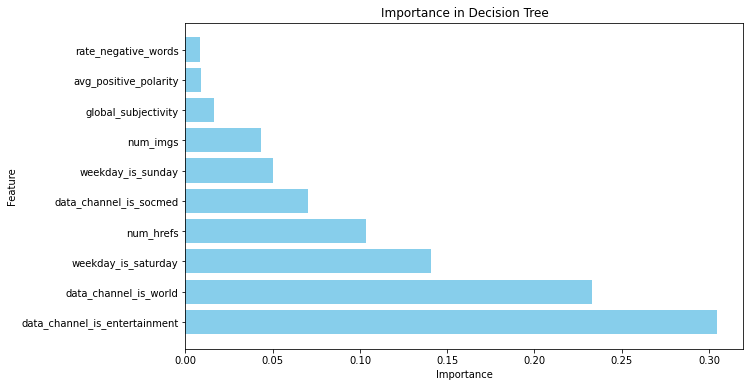

In [44]:
# Get top 10 features
feature_importances = dt_model.feature_importances_

importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)
top_10_features = importance_df.head(10)


plt.figure(figsize=(10, 6))
plt.barh(top_10_features['Feature'], top_10_features['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Importance in Decision Tree')
plt.show()

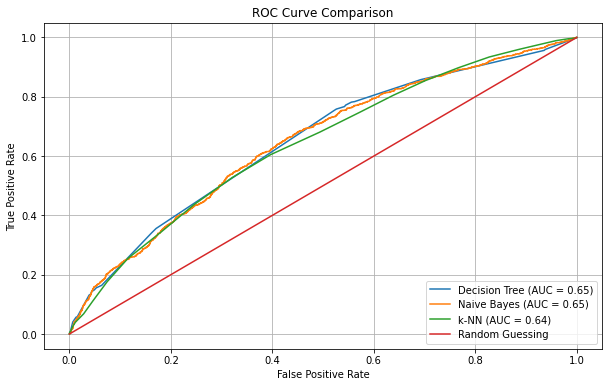

In [45]:
dt_probs = dt_model.predict_proba(X_test)[:, 1]
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_probs)
dt_auc = auc(dt_fpr, dt_tpr)

nb_probs = nb_model.predict_proba(X_test)[:, 1]
nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_probs)
nb_auc = auc(nb_fpr, nb_tpr)

knn_probs = knn.predict_proba(X_test)[:, 1]
knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_probs)
knn_auc = auc(knn_fpr, knn_tpr)

plt.figure(figsize=(10, 6))
plt.plot(dt_fpr, dt_tpr,label=f'Decision Tree (AUC = {dt_auc:.2f})')
plt.plot(nb_fpr, nb_tpr,label=f'Naive Bayes (AUC = {nb_auc:.2f})')
plt.plot(knn_fpr, knn_tpr,label=f'k-NN (AUC = {knn_auc:.2f})')
plt.plot([0, 1], [0, 1],label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.grid()
plt.show()

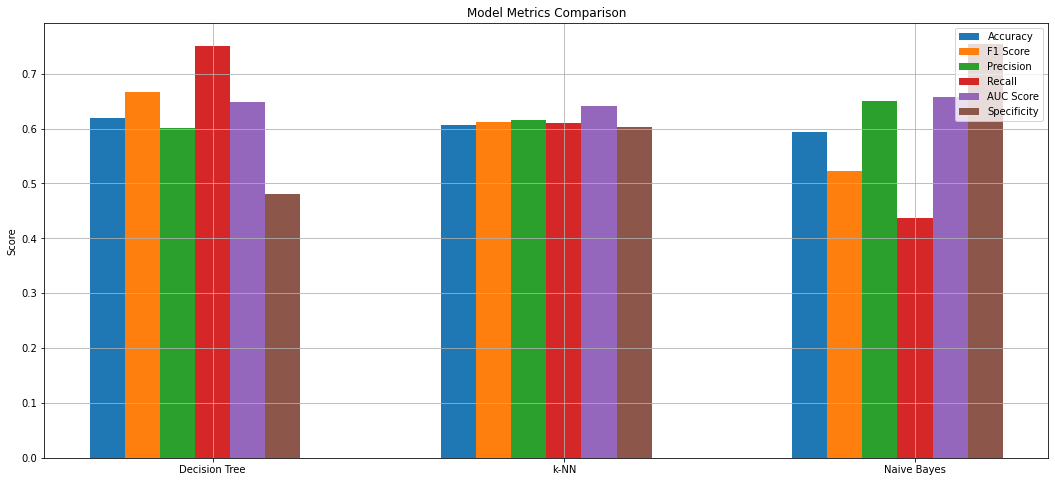

In [46]:
models = ['Decision Tree', 'k-NN', 'Naive Bayes']
accuracy = [dt_val_accuracy, knn_val_accuracy, nb_val_accuracy]
f1 = [dt_f1, knn_f1, nb_f1]
precision = [dt_precision,knn_precision, nb_precision]
recall = [dt_recall, knn_recall, nb_recall]
auc_score = [dt_val_auc, knn_val_auc, nb_val_auc]
specificity = [dt_specificity, knn_specificity, nb_specificity]

# count model
x = np.arange(len(models))
width = 0.1

plt.figure(figsize=(18, 8))
plt.bar(x - width*3, accuracy, width, label='Accuracy')
plt.bar(x - width*2, f1, width, label='F1 Score')
plt.bar(x - width, precision, width, label='Precision')
plt.bar(x, recall, width, label='Recall')
plt.bar(x + width, auc_score, width, label='AUC Score')
plt.bar(x + width*2, specificity, width, label='Specificity')

plt.xticks(x, models)
plt.ylabel("Score")
plt.title("Model Metrics Comparison")
plt.legend()
plt.grid()
plt.show()


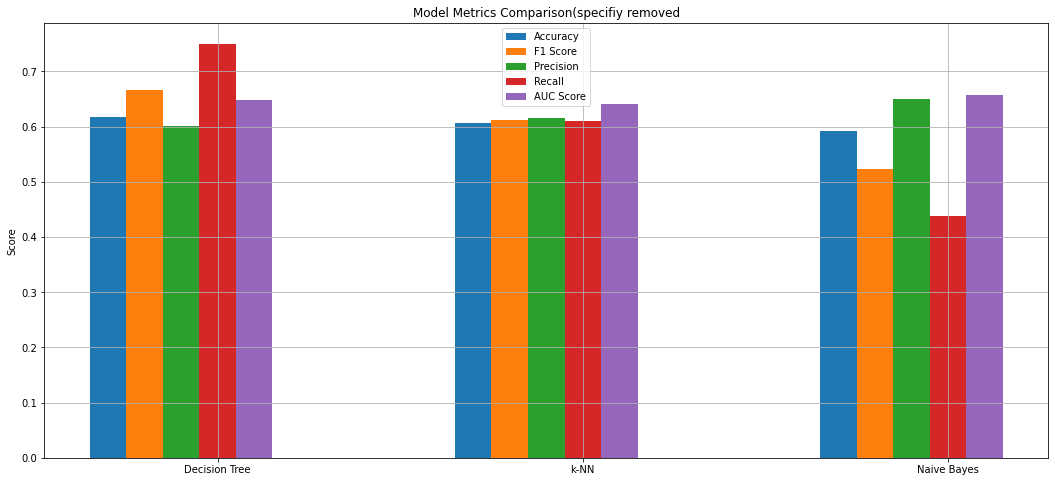

In [47]:
models = ['Decision Tree', 'k-NN', 'Naive Bayes']
accuracy = [dt_val_accuracy, knn_val_accuracy, nb_val_accuracy]
f1 = [dt_f1, knn_f1, nb_f1]
precision = [dt_precision,knn_precision, nb_precision]
recall = [dt_recall, knn_recall, nb_recall]
auc_score = [dt_val_auc, knn_val_auc, nb_val_auc]

# count model
x = np.arange(len(models))
width = 0.1

plt.figure(figsize=(18, 8))
plt.bar(x - width*3, accuracy, width, label='Accuracy')
plt.bar(x - width*2, f1, width, label='F1 Score')
plt.bar(x - width, precision, width, label='Precision')
plt.bar(x, recall, width, label='Recall')
plt.bar(x + width, auc_score, width, label='AUC Score')

plt.xticks(x, models)
plt.ylabel("Score")
plt.title("Model Metrics Comparison(specifiy removed")
plt.legend()
plt.grid()
plt.show()


In [48]:
# decision tree with max depth: 4
# set is_popular as 70% = accuracy is 69%, 75% = accuracy is 75%, 80% = accuracy is 78%, 85% = accuracy is 84%, 90% = accuracy is 95%
# set is_popular as 70% = f1 is 61%, 75% = f1 is 0.67%, 80% = f1 is 71%,  85% = f1 is 77%, 95% = f1 is 95%, f1 = 92%
# as is_popular more high all the algorithm goes higher

In [49]:
# citation
# https://datascience.stackexchange.com/questions/28493/confusion-matrix-get-items-fp-fn-tp-tn-python
# https://www.geeksforgeeks.org/calculate-sensitivity-specificity-and-predictive-values-in-caret/
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.feature_importances_
# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
# https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB
# https://numpy.org/doc/stable/reference/generated/numpy.percentile.html
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.apply.html
# https://docs.python.org/3/tutorial/datastructures.html#list-comprehensions
# https://docs.python.org/3/library/stdtypes.html#str.join
# https://www.delftstack.com/ko/howto/python/plot-roc-curve-python/
# https://stackoverflow.com/questions/25009284/how-to-plot-roc-curve-in-python
# https://plotly.com/python/roc-and-pr-curves/
# https://www.kaggle.com/datasets/thehapyone/uci-online-news-popularity-data-set?resource=download